Adit Verma


##AIM: To remove noise from a given audio file using stationary and non-stationary noise reduction algorithm

##Introduction


1.   Noise Reduction:<br>
Noise reduction is the process of removing noise from a signal. Noise reduction techniques exist for audio and images. Noise reduction algorithms may distort the signal to some degree. All signal processing devices, both analog and digital, have traits that make them susceptible to noise. Noise can be random with an even frequency distribution (white noise), or frequency-dependent noise introduced by a device's mechanism or signal processing algorithms. We will be covering both examples.<br>
In this project we will be covering stationary and non-stationary noise reduction algorithm
2.   Stationary Noise Reduction Algorithm<br>
The basic intuition is that statistics are calculated on each frequency channel to determine a noise gate. Then the gate is applied to the signal.<br>
Steps of the Stationary Noise Reduction algorithm:

    * A spectrogram is calculated over the noise audio clip
    * Statistics are calculated over spectrogram of the the noise (in frequency)
    * A threshold is calculated based upon the statistics of the noise (and the desired sensitivity of the algorithm)
    * A spectrogram is calculated over the signal
    * A mask is determined by comparing the signal spectrogram to the threshold
    * The mask is smoothed with a filter over frequency and time
    * The mask is appled to the spectrogram of the signal, and is inverted If the noise signal is not provided, the algorithm will treat the signal as the noise clip, which tends to work pretty well


3.   Non-Stationary Noise Reduction Algorithm<br>
The non-stationary noise reduction algorithm is an extension of the stationary noise reduction algorithm, but allowing the noise gate to change over time.<br>
Steps of the Non-stationary Noise Reduction algorithm
    * A spectrogram is calculated over the signal
    * A time-smoothed version of the spectrogram is computed using an IIR filter aplied forward and backward on each frequency channel.
    * A mask is computed based on that time-smoothed spectrogram
    * The mask is smoothed with a filter over frequency and time
    * The mask is appled to the spectrogram of the signal, and is inverted


##Implementation:

#### Downloading noisereduce, librosa, soundfile packages:

In [ ]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

# Test noise reduction algorithm and view steps of algorithm

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

### Load data

In [ ]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [ ]:
IPython.display.Audio(data=data, rate=rate)

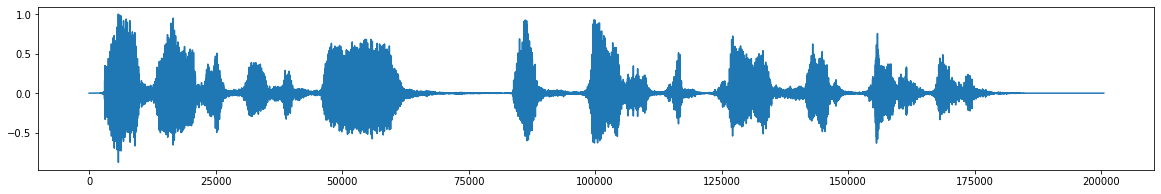

In [ ]:
#plot
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### add noise

In [ ]:
noise_len = 2 # seconds

#adding white noise
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]

audio_clip_band_limited = data+noise

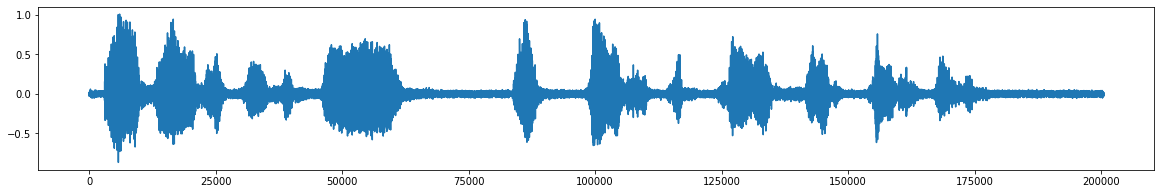

In [ ]:
#plot
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [ ]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

### Stationary remove noise

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

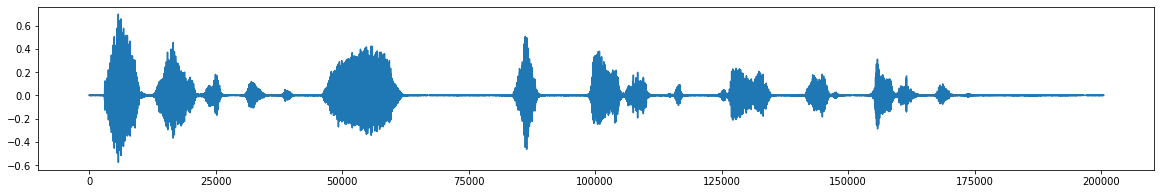

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### Non-stationary noise reduction

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

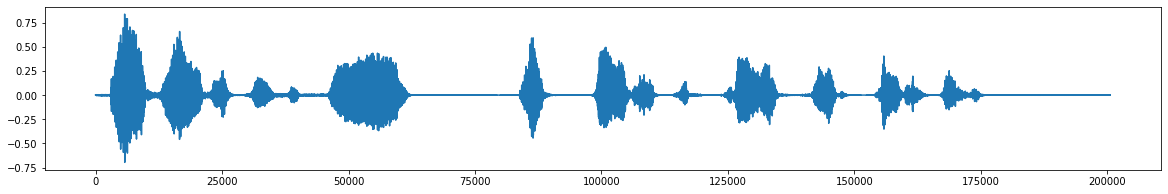

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

## A more difficult example 

In [ ]:
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
response = urllib.request.urlopen(url)
noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

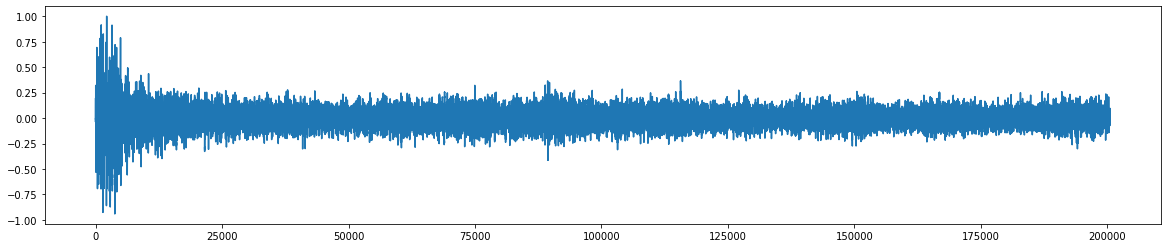

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [ ]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

### add noise to data

In [ ]:
snr = 2 # signal to noise ratio

#adding noise
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

### plot noisy data

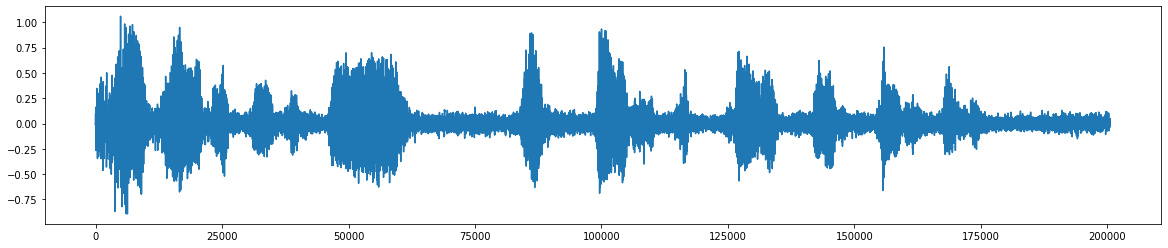

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)
IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

### Stationary remove noise

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, y_noise = noise_clip, n_std_thresh_stationary=1.5,stationary=True)

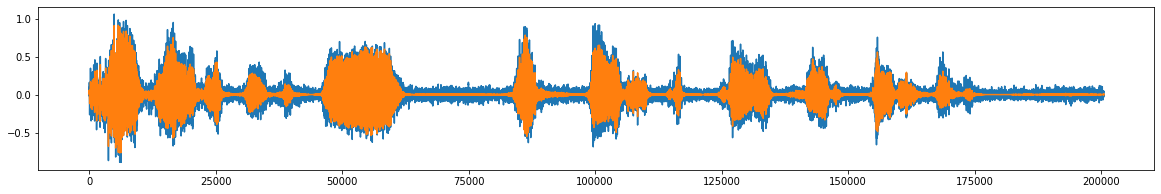

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

### Non-stationary noise reduction

In [ ]:
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

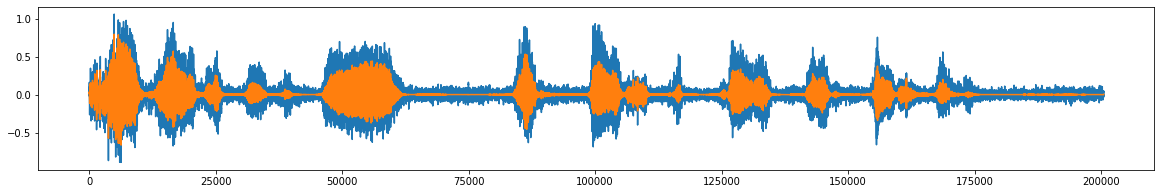

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise, alpha = 1)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

##Result and analysis

As it is visible in plot and can be audible that the noise we added in our audio file is significantly reduced. The final audio is least distorted and every word is clearly audible. Hence the Stationary noise reduction algorithm followed by non-stationary noise reduction algorithm had worked efficiently.

##Conclusion


1. Read and Write function in an audio file is been done using soundfile library.
2. Stationary and non-stationary noise reduction is successfully implemented by nr.filename() using noisereduce package.
3. Audio is plotted as well as compared using axes plot or ax.plot by matplotlib library.
4. We have also displayed audio so that noise reduction is audible using IPython library 

